In [34]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [35]:
import numpy as np
import pandas as pd

In [100]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [50]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [38]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [39]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [40]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [41]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [194]:
# Create our session (link) from Python to the DB
session = Session(engine)
session.query

<bound method Session.query of <sqlalchemy.orm.session.Session object at 0x000001E2869FC6A0>>

# Exploratory Climate Analysis

In [189]:
#columns = inspect(engine).get_columns('Measurement')
#for column in columns:
#    print(column["name"], column["type"])
hawaii_query = {}

for row in session.query(Measurement.date, Measurement.prcp).all():
    #print('{0:%Y-%m-%d}'.format(row))
    hawaii_query.update({row})

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


{'2010-01-01': 0.14,
 '2010-01-02': 0.0,
 '2010-01-03': 0.0,
 '2010-01-04': 0.0,
 '2010-01-06': 0.36,
 '2010-01-07': 0.3,
 '2010-01-08': 0.0,
 '2010-01-09': 0.0,
 '2010-01-10': 0.01,
 '2010-01-11': 0.14,
 '2010-01-12': 0.0,
 '2010-01-14': 0.0,
 '2010-01-15': 0.0,
 '2010-01-16': 0.0,
 '2010-01-17': 0.0,
 '2010-01-18': 0.0,
 '2010-01-19': 0.0,
 '2010-01-20': 0.0,
 '2010-01-21': 0.32,
 '2010-01-22': 0.0,
 '2010-01-23': 0.0,
 '2010-01-24': 0.01,
 '2010-01-25': 0.0,
 '2010-01-26': 0.03,
 '2010-01-27': 0.31,
 '2010-01-28': 0.07,
 '2010-01-30': 0.33,
 '2010-01-31': 1.1,
 '2010-02-01': 0.01,
 '2010-02-03': 0.67,
 '2010-02-04': 0.0,
 '2010-02-05': 0.09,
 '2010-02-06': 0.04,
 '2010-02-07': 0.0,
 '2010-02-08': 0.0,
 '2010-02-09': 0.0,
 '2010-02-11': 0.0,
 '2010-02-12': 0.65,
 '2010-02-13': 0.62,
 '2010-02-14': 0.02,
 '2010-02-15': 0.0,
 '2010-02-16': 0.0,
 '2010-02-17': 0.02,
 '2010-02-19': 0.42,
 '2010-02-20': 0.55,
 '2010-02-21': 0.0,
 '2010-02-22': None,
 '2010-02-23': 0.0,
 '2010-02-24': 0.0,

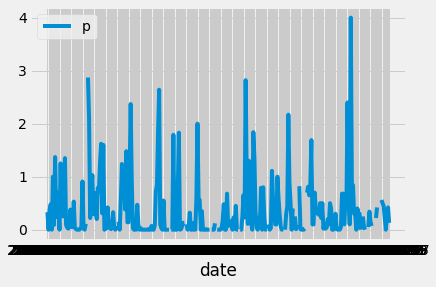

In [155]:
# Design a query to retrieve the last 12 months of precipitation data prior to your 
#trips start date and plot the results

# Perform a query to retrieve the date and prcp values

hawaii_query = {}

for row in session.query(Measurement.date, Measurement.prcp).all():
    #print('{0:%Y-%m-%d}'.format(row))
    hawaii_query.update({row})

lastyeardate = dt.date.today() - dt.timedelta(days=730)
date = '{0:%Y-%m-%d}'.format(lastyeardate)
date

# Save the query results as a Pandas DataFrame and set the index to the date column

hawaii_df = pd.DataFrame.from_dict(hawaii_query, orient="index")
hawaii_df
not_2017 = hawaii_df[hawaii_df.index < date]
hawaii_2017 = hawaii_df.drop(not_2017.index, axis=0)
hawaii_2017 = hawaii_2017.rename(columns={"0": "Precipitation"})
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

plt.plot(hawaii_2017)
# Rotate the xticks for the dates 
#    When I try to rotate the xticks, I get a huge black mess. Probably formatting error
plt.xlabel("date")
plt.legend("prcp")
plt.show()

In [222]:
# Use Pandas to calcualte the summary statistics for the precipitation data
hawaii_2017.describe()

,0
count,293.000000
mean,0.367201
std,0.572963
min,0.000000
25%,0.000000
50%,0.110000
75%,0.500000
max,4.000000


In [188]:
columns = inspect(engine).get_columns('Station')
for column in columns:
    print(column["name"], column["type"])
    
station_df = pd.read_sql(session.query(Station).statement, session.bind)
station_df
#for row in session.query(Station.id, Station.station, Station.name, Station.latitude, 
#                         Station.longitude, Station.elevation).all():
#    station_dict.update({row})

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [183]:
# How many stations are available in this dataset?

#columns = inspect(engine).get_columns('station')
#for column in columns:
#    print(column["name"], column["type"])

#for row in session.query(Station.station).limit(5).all():
#    print(row)

stations = len(session.query(Station.station).all())
stations

9

In [208]:
# What are the most active stations?
# List the stations and the counts in descending order.

session.query(Measurement.id, Station.station).limit(100).all()

session.query(func.count(Measurement.id), Measurement.station, Station.name).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()


[(2772, 'USC00519281', 'WAIHEE 837.5, HI US'),
 (2724, 'USC00519397', 'WAIKIKI 717.2, HI US'),
 (2709, 'USC00513117', 'KANEOHE 838.1, HI US'),
 (2669, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 (2612, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US'),
 (2202, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 (1979, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 (1372, 'USC00517948', 'PEARL CITY, HI US'),
 (511, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US')]

In [220]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.count(Measurement.id), Measurement.station, Station.name, func.min(Measurement.tobs),
              func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()

(2772, 'USC00519281', 'WAIHEE 837.5, HI US', 54.0, 85.0, 71.66378066378067)

(array([ 3.,  8.,  7., 16., 29., 36., 25., 21., 16.,  3.,  6.,  5.]),
 array([59.  , 61.25, 63.5 , 65.75, 68.  , 70.25, 72.5 , 74.75, 77.  ,
        79.25, 81.5 , 83.75, 86.  ]),
 <a list of 12 Patch objects>)

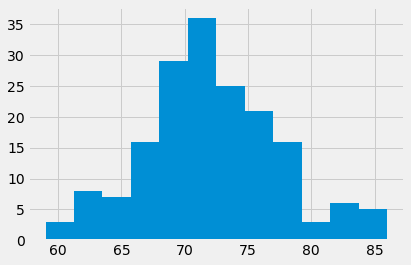

In [245]:
# Choose the station with the highest number of temperature observations.

#session.query(Measurement.station, Station.name, func.max(Measurement.tobs)).\
#    filter(Measurement.station == Station.station).\
#    group_by(Measurement.station).\
#    order_by(func.max(Measurement.tobs).desc()).first()

# Query the last 12 months of temperature observation data previous to your 
# trips start date for this station and plot the results as a histogram

result = session.query(Measurement.tobs, Station.name, Measurement.date).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.station == 'USC00511918').\
    filter(Measurement.date > '2015-01-15').all()
#    order_by((Measurement.date).desc()).all()

data = []
xTickMarks = []

for row in result:
    data.append(int(row[0]))
    xTickMarks.append(str(row[0]))
    
plt.hist(data, bins=12)

#2016-10-15

In [246]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [249]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = dt.date(2015, 1, 15) - dt.timedelta(days=365)
end_date = dt.date(2015, 1, 22) - dt.timedelta(days=365)

TMIN, TAVE, TMAX = calc_temps(start_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d"))[0]
print(TMIN, TAVE, TMAX)

62.0 68.53571428571429 76.0


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [251]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

last_year = session.query(Station.station, Station.name, Station.latitude, 
                          Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
last_year

[('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  5.269999999999998),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  5.269999999999998),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  5.269999999999998),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  5.269999999999998),
 ('USC00517948',
  'PEARL CITY, HI US',
  21.3934,
  -157.9751,
  11.9,
  5.269999999999998),
 ('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6,
  5.269999999999998),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  5.269999999999998),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  5.269999999999998),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  5.269999999999998)]

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
